## Frontmatter

**Units**

- baseflow - mm/water year
- precip - mm/water year
- runoff - mm/water year
- snowmelt - m/day
- wflux - m/day

In [14]:
import statsmodels.formula.api as smf
import seaborn as sns

In [15]:
df = pd.read_pickle('./data/HW_PGW_wrf_data.df')

In [16]:
tmp = np.load('./data/HW_index_cells_by_basin.npz')
cells = tmp['cells']
watersheds = tmp['watersheds']
percents = tmp['percents']

In [4]:
# for each watershed, compute mean arial precipitation, runoff, and baseflow plus some others

def extract_watershed(watershed,cells,percents):
    tmp = pd.DataFrame({'idx':cells,'percent':percents}) # cell index numbers and their proportion in the basin
    tmp = pd.merge(left=tmp,right=df,how='inner',on='idx') # generate a data frame of percents, index cells, water years and data
    
    # compute the weights for the variables
    tmp['weight'] = 1./len(tmp)
    tmp['weight'] *= tmp['percent']
    
    for var in ['baseflow','precip','runoff','snowmelt','wflux']:
        
        tmp[var] *= tmp['weight'] # scale the cell values by the percent the cell is in the watershed
    
    tmp1 = tmp.groupby(by='wyear').sum() # compute Mean area values for each water year for each variable
    
    tmp1['huc8'] = watershed # add the watershed identifier to the data frame
    del tmp['idx']
    
    return tmp1,tmp

In [20]:
out = pd.DataFrame()
for w,c,p in zip(watersheds,cells,percents):
    tmp1,tmp = extract_watershed(w,c,p)
    out = out.append(tmp1)

out['Q_P'] = (out['baseflow']+out['runoff'])/out['precip']

In [21]:
out

,idx,percent,baseflow,precip,runoff,snowmelt,wflux,weight,huc8,Q_P
wyear,,,,,,,,,,
2001,14888123,229.30,5.935886,59.296546,3.197140,0.001979,0.002071,0.107754,10180001,0.154023
2002,14888123,229.30,3.422186,52.206913,0.995431,0.001489,0.001548,0.107754,10180001,0.084617
2003,14888123,229.30,7.436451,59.297079,2.341142,0.002058,0.002152,0.107754,10180001,0.164892
2004,14888123,229.30,4.645024,56.700198,1.167875,0.001677,0.001750,0.107754,10180001,0.102520
2005,14888123,229.30,10.604229,63.790391,3.810899,0.002080,0.002184,0.107754,10180001,0.225976
2006,14888123,229.30,10.151935,68.341438,1.656819,0.002312,0.002387,0.107754,10180001,0.172791
2007,14888123,229.30,8.501735,69.167432,2.867301,0.002151,0.002239,0.107754,10180001,0.164370
2008,14888123,229.30,10.965105,65.882725,2.404482,0.002509,0.002595,0.107754,10180001,0.202930
2001,26855444,362.18,2.742846,52.935607,1.845870,0.001403,0.001493,0.104315,10180010,0.086685


In [41]:
out.to_pickle('./data/wrf_hw_pgw_diversion_sm_rr.pcl')

In [43]:
## load the diversions
data = pd.read_excel('/Volumes/shareProjects/WSC/data/DWR_data/diversions/Transbasin_Structures_detailed_TBB.xlsx')

In [44]:
div = []
for cont,rec in zip(data.HUC8From.as_matrix(),data.Huc8To.as_matrix()):
    div.append('%s:%s'%(cont,rec))

In [45]:
div = np.unique(div)

In [46]:
huc8from = []
huc8to = []
namefrom = []
nameto = []
divname = []
for d in div:
    tmp = d.split(':')
    huc8from.append(int(tmp[0]))
    huc8to.append(int(tmp[1]))
    tn = data.loc[(data.HUC8From == int(tmp[0])) & (data.Huc8To == int(tmp[1]))].HUC8ToName.as_matrix()
    fn = data.loc[(data.HUC8From == int(tmp[0])) & (data.Huc8To == int(tmp[1]))].HUC8FromName.as_matrix()
    namefrom.append(str(fn[0]))
    nameto.append(str(tn[0]))
    divname.append(str(fn[0])+' : '+str(tn[0]))

In [47]:
dat = pd.DataFrame({'diversion':div,'huc8from':huc8from,'huc8to':huc8to,'fromname':namefrom,'toname':nameto,'diversionname':divname})

In [48]:
dat.to_pickle('./data/diversions.pcl')

In [27]:
for i in dat.index:
    # pull out the contributing and recieving basins for each diversion
    ht = dat.loc[i].huc8to
    hf = dat.loc[i].huc8from
    
    mod1 = smf.ols('Q_P ~ wflux + 1',out.loc[out.huc8==ht]).fit() # Receiving basin
    mod2 = smf.ols('Q_P ~ wflux + 1',out.loc[out.huc8==hf]).fit() # contributing basin
    
    dat.loc[i,'from_slope'] = mod2.params['wflux']
    dat.loc[i,'from_int'] = mod2.params['Intercept']
    dat.loc[i,'from_r2'] = mod2.rsquared
    dat.loc[i,'from_pval'] = mod2.f_pvalue
    
    dat.loc[i,'to_slope'] = mod1.params['wflux']
    dat.loc[i,'to_int'] = mod1.params['Intercept']
    dat.loc[i,'to_r2'] = mod1.rsquared
    dat.loc[i,'to_pval'] = mod1.f_pvalue
    
    dat.loc[i,'ratio'] = mod2.params['wflux'] / mod1.params['wflux']

In [28]:
mod2.conf_int()

,0,1
Intercept,-0.095958,0.230757
wflux,-67.210499,141.436119


In [29]:
dat.to_excel('./figures/PGW_CTRL_transbasin_diversions.xlsx')

In [30]:
dat

,diversion,diversionname,fromname,huc8from,huc8to,toname,from_slope,from_int,from_r2,from_pval,to_slope,to_int,to_r2,to_pval,ratio
0,10180001:10190007,North Platte Headwaters : Cache La Poudre,North Platte Headwaters,10180001,10190007,Cache La Poudre,119.271015,-0.093346,0.722334,0.007531,79.018669,0.015870,0.623925,0.019689,1.509403
1,10180010:10190007,Upper Laramie : Cache La Poudre,Upper Laramie,10180010,10190007,Cache La Poudre,56.539122,-0.004912,0.740163,0.006118,79.018669,0.015870,0.623925,0.019689,0.715516
2,14010001:10190004,Colorado Headwaters : Clear,Colorado Headwaters,14010001,10190004,Clear,72.344350,0.028001,0.242661,0.214906,106.457572,0.080594,0.853647,0.001039,0.679560
3,14010001:10190005,Colorado Headwaters : St. Vrain,Colorado Headwaters,14010001,10190005,St. Vrain,72.344350,0.028001,0.242661,0.214906,96.755615,0.047566,0.674269,0.012455,0.747702
4,14010001:10190006,Colorado Headwaters : Big Thompson,Colorado Headwaters,14010001,10190006,Big Thompson,72.344350,0.028001,0.242661,0.214906,63.383191,0.041393,0.303069,0.157375,1.141381
5,14010001:10190007,Colorado Headwaters : Cache La Poudre,Colorado Headwaters,14010001,10190007,Cache La Poudre,72.344350,0.028001,0.242661,0.214906,79.018669,0.015870,0.623925,0.019689,0.915535
6,14010002:10190001,Blue : South Platte Headwaters,Blue,14010002,10190001,South Platte Headwaters,48.297650,0.144466,0.054405,0.578260,66.446969,0.035963,0.166879,0.314995,0.726860
7,14010002:10190002,Blue : Upper South Platte,Blue,14010002,10190002,Upper South Platte,48.297650,0.144466,0.054405,0.578260,31.686418,0.082538,0.567108,0.031016,1.524238
8,14010002:10190004,Blue : Clear,Blue,14010002,10190004,Clear,48.297650,0.144466,0.054405,0.578260,106.457572,0.080594,0.853647,0.001039,0.453680
9,14010003:11020001,Eagle : Arkansas Headwaters,Eagle,14010003,11020001,Arkansas Headwaters,117.418002,-0.074552,0.843918,0.001265,82.562156,0.045881,0.424719,0.079959,1.422177


In [31]:
out['wateryear'] = out.index

In [32]:
test = out.groupby(by=['huc8','wateryear']).sum()
del test['idx']
del test['percent']
del test['wflux']
del test['weight']
del test['snowmelt']

test.reset_index(inplace=True)

In [33]:
test = test.groupby(by='huc8').mean()
del test['wateryear']

In [34]:
huc8s = []
names = []

for i in data.index:
    huc8s.append(data.loc[i].Huc8To)
    names.append(str(data.loc[i].HUC8ToName))
    huc8s.append(data.loc[i].HUC8From)
    names.append(str(data.loc[i].HUC8FromName))

In [35]:
huc8s = pd.DataFrame({'huc8':huc8s,'watershed':names})

In [36]:
test['basin'] = np.NaN
for i in test.index:
    test.loc[i,'basin'] = huc8s.loc[huc8s.huc8==i].watershed.as_matrix()[0]
    
test.reset_index(inplace=True)
test.index = test.basin

del test['basin']

bf = test.baseflow.as_matrix()
ro = test.runoff.as_matrix()

test['Q'] = bf+ro

In [37]:
test

,huc8,baseflow,precip,runoff,Q_P,Q
basin,,,,,,
North Platte Headwaters,10180001,7.707819,61.835340,2.305136,0.159015,10.012955
Upper Laramie,10180010,2.160727,51.440626,1.422063,0.068111,3.582790
South Platte Headwaters,10190001,2.518899,48.880936,2.599251,0.103264,5.118149
Upper South Platte,10190002,4.640677,56.115048,2.148630,0.118831,6.789307
Clear,10190004,11.936953,60.331888,2.940497,0.241920,14.877451
St. Vrain,10190005,7.935948,57.519855,1.899598,0.168092,9.835546
Big Thompson,10190006,4.401370,54.144304,1.604805,0.109301,6.006175
Cache La Poudre,10190007,3.493748,51.888968,1.618293,0.096557,5.112040
Arkansas Headwaters,11020001,5.588339,54.581885,3.311022,0.160746,8.899361


In [38]:
# create a data frame with diversions

out2 = pd.DataFrame()
for i in dat.index:
    diversion = dat.loc[i].diversionname
    h8f = dat.loc[i].huc8from
    h8t = dat.loc[i].huc8to
    
    tmp = out.loc[out.huc8==h8f].copy()
    tmp['diversionname'] = diversion
    tmp['type'] = 'contributing'
    out2 = out2.append(tmp)
    
    tmp = out.loc[out.huc8==h8t].copy()
    tmp['diversionname'] = diversion
    tmp['type'] = 'receiving'
    out2 = out2.append(tmp)

In [39]:
out2.wflux *= 1000. # m/day > mm/day

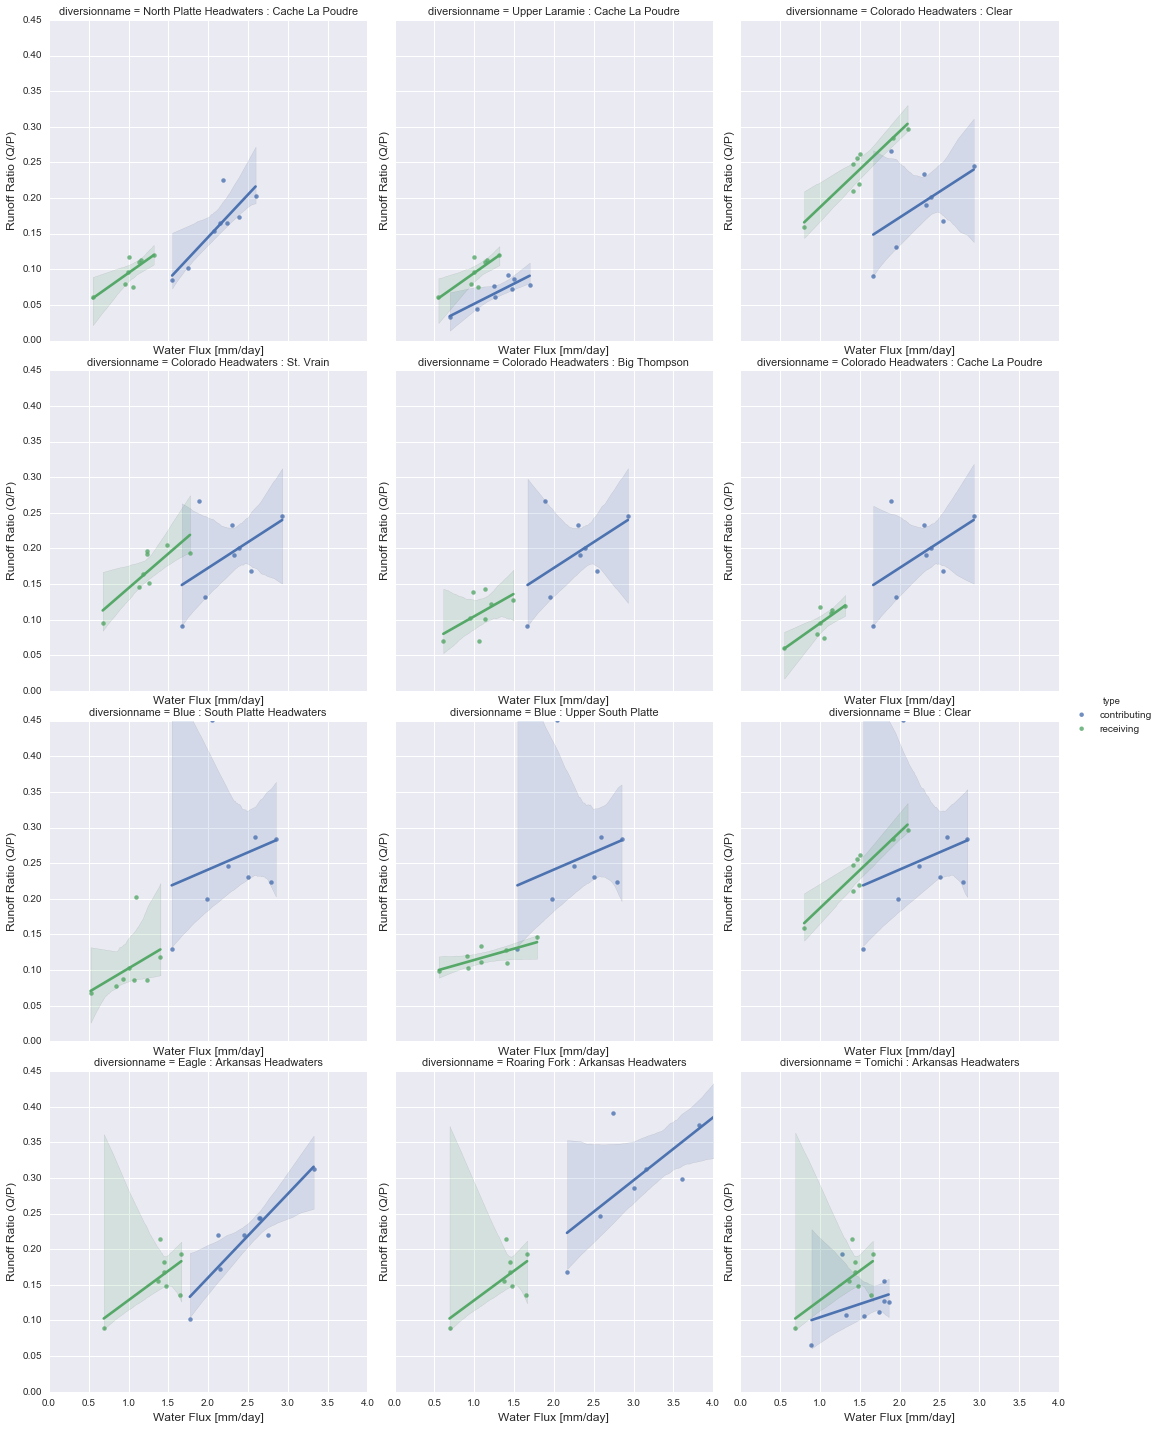

In [40]:
p = sns.lmplot('wflux','Q_P',out2, hue='type', col='diversionname',col_wrap=3,size=5, truncate=True)

for ax in p.axes.flat:
    ax.set_ylim(0,0.45)
    ax.set_xlim(0,4.0)
    ax.axhline(1,c='k')
    ax.set_xlabel('Water Flux [mm/day]', fontsize=12)
    ax.set_ylabel('Runoff Ratio (Q/P)', fontsize=12)
    
plt.savefig('./figures/HW_PGW_transbasin_sensitivity_wrf.pdf',bbox_inches='tight')

In [ ]:
gplt.facet_wrap()